In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("/content/Loan payments data.csv")

In [3]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [5]:
df.describe()

,Principal,terms,past_due_days,age
count,500.000000,500.000000,200.00000,500.000000
mean,943.200000,22.824000,36.01000,31.116000
std,115.240274,8.000064,29.38088,6.084784
min,300.000000,7.000000,1.00000,18.000000
25%,1000.000000,15.000000,3.00000,27.000000
50%,1000.000000,30.000000,37.00000,30.000000
75%,1000.000000,30.000000,60.00000,35.000000
max,1000.000000,30.000000,76.00000,51.000000


In [6]:
df.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [7]:
# Handling Missing Values
df['paid_off_time'].fillna('Not Paid Off', inplace=True)
df['past_due_days'].fillna(0, inplace=True)

# Convert 'Not Paid Off' and 'NaT' to NaN for paid_off_time column
df['paid_off_time'] = df['paid_off_time'].replace(['Not Paid Off', pd.NaT], pd.NaT)

# Convert 'paid_off_time' column to datetime objects
df['paid_off_time'] = pd.to_datetime(df['paid_off_time'], errors='coerce')

# Replace remaining null values in 'paid_off_time' with the minimum date in the dataset
# print(df['paid_off_time'].min().info)
min_date = df['paid_off_time'].min()
df['paid_off_time'].fillna(min_date, inplace=True)

# Now, convert the 'paid_off_time' column to datetime
df['paid_off_time'] = pd.to_datetime(df['paid_off_time'])

# Check for null values again
print(df.isnull().sum())

Loan_ID           0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
paid_off_time     0
past_due_days     0
age               0
education         0
Gender            0
dtype: int64


In [8]:
# Check numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical Columns:")
print(numerical_columns)

# Check categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
print(categorical_columns)

Numerical Columns:
Index(['Principal', 'terms', 'past_due_days', 'age'], dtype='object')

Categorical Columns:
Index(['Loan_ID', 'loan_status', 'effective_date', 'due_date', 'education',
       'Gender'],
      dtype='object')


In [9]:
# Convert 'effective_date' and 'due_date' columns to datetime objects
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['due_date'] = pd.to_datetime(df['due_date'])

# Calculate 'loan_term_days'
df['loan_term_days'] = (df['due_date'] - df['effective_date']).dt.days

# Now 'loan_term_days' should be available in your DataFrame
print(df['loan_term_days'])

0      29
1      29
2      29
3      14
4      29
       ..
495    29
496    14
497    14
498    59
499    29
Name: loan_term_days, Length: 500, dtype: int64


In [10]:
# Define a function to remove outliers based on IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_outliers_removed = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_outliers_removed

# Remove outliers from numerical columns
numerical_columns = ['Principal', 'terms', 'past_due_days', 'age', 'loan_term_days']
for column in numerical_columns:
    df = remove_outliers(df, column)

# Check the shape of the dataframe after removing outliers
print("Shape of dataframe after removing outliers:", df.shape)

Shape of dataframe after removing outliers: (269, 12)


In [11]:
# Define a function to identify and remove outliers based on IQR method
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Identify outliers for numerical columns
numerical_columns = ['Principal', 'terms', 'past_due_days', 'age', 'loan_term_days']
all_outliers = pd.DataFrame()
for column in numerical_columns:
    outliers = identify_outliers(df, column)
    all_outliers = pd.concat([all_outliers, outliers])

# Print out the outliers
print("Outliers:")
print(all_outliers)

Outliers:
         Loan_ID         loan_status  Principal  terms effective_date  \
400  xqd20160401  COLLECTION_PAIDOFF       1000     30     2016-09-09   
401  xqd20160402  COLLECTION_PAIDOFF       1000     15     2016-09-09   
403  xqd20160404  COLLECTION_PAIDOFF       1000     15     2016-09-09   
405  xqd20160406  COLLECTION_PAIDOFF       1000     30     2016-09-10   
407  xqd20160408  COLLECTION_PAIDOFF       1000     30     2016-09-10   
..           ...                 ...        ...    ...            ...   
493  xqd20160494  COLLECTION_PAIDOFF       1000     15     2016-09-12   
494  xqd20160495  COLLECTION_PAIDOFF       1000     30     2016-09-12   
495  xqd20160496  COLLECTION_PAIDOFF       1000     30     2016-09-12   
496  xqd20160497  COLLECTION_PAIDOFF       1000     15     2016-09-12   
499  xqd20160500  COLLECTION_PAIDOFF       1000     30     2016-09-12   

      due_date       paid_off_time  past_due_days  age             education  \
400 2016-10-08 2016-10-10 11:45:0

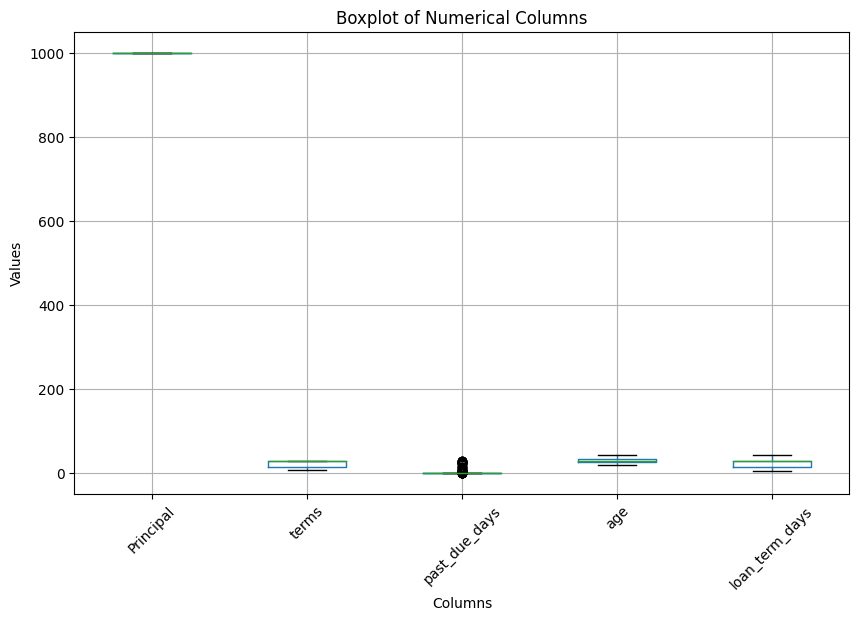

In [12]:
import matplotlib.pyplot as plt  # Import Matplotlib

# Define numerical columns
numerical_columns = ['Principal', 'terms', 'past_due_days', 'age', 'loan_term_days']

# Create boxplots for numerical columns
plt.figure(figsize=(10, 6))
df[numerical_columns].boxplot()
plt.title('Boxplot of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

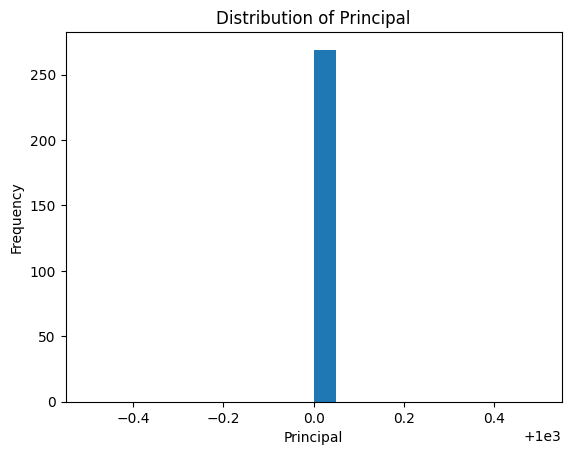

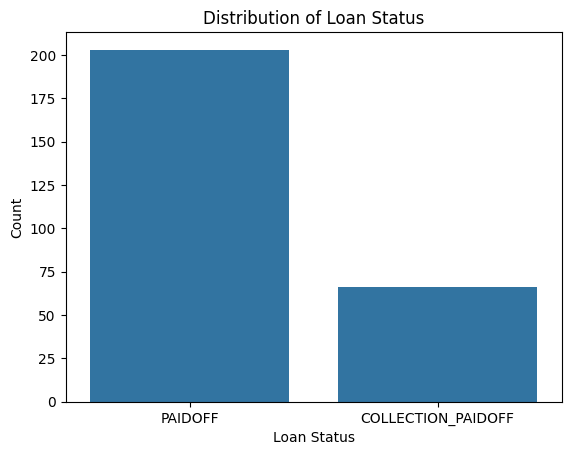

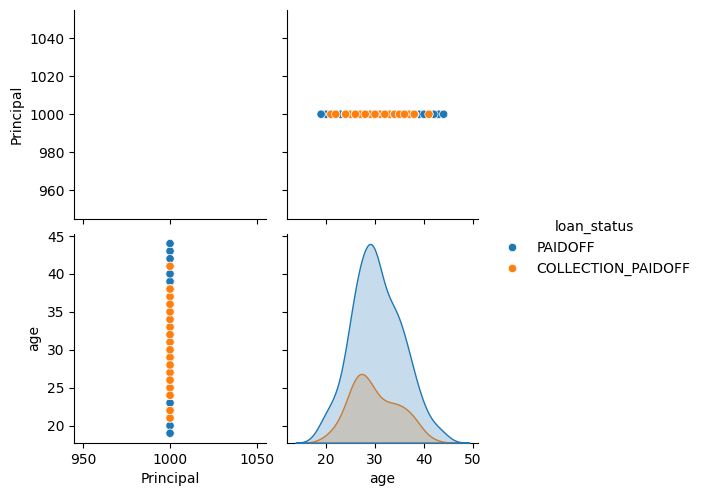

In [13]:
# Univariate Analysis (Histograms)
import matplotlib.pyplot as plt

plt.hist(df['Principal'], bins=20)
plt.xlabel('Principal')
plt.ylabel('Frequency')
plt.title('Distribution of Principal')
plt.show()

# Bivariate Analysis (Bar Plots)
import seaborn as sns

sns.countplot(x='loan_status', data=df)
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status')
plt.show()

# Multivariate Analysis (Pair Plots)
sns.pairplot(df[['Principal', 'age', 'loan_status']], hue='loan_status')
plt.show()

In [14]:
# Create New Features
df['loan_term_days'] = (df['due_date'] - df['effective_date']).dt.days

# Normalize Numerical Features (Min-Max Scaling)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Principal', 'age', 'loan_term_days']] = scaler.fit_transform(df[['Principal', 'age', 'loan_term_days']])

In [15]:
df.dtypes

Loan_ID                   object
loan_status               object
Principal                float64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
paid_off_time     datetime64[ns]
past_due_days            float64
age                      float64
education                 object
Gender                    object
loan_term_days           float64
dtype: object

In [16]:
# Convert datetime columns to string (object) type
df['effective_date'] = df['effective_date'].astype(str)
df['due_date'] = df['due_date'].astype(str)
df['paid_off_time'] = df['paid_off_time'].astype(str)

# Now the datetime columns are converted to object type
print(df.dtypes)

Loan_ID            object
loan_status        object
Principal         float64
terms               int64
effective_date     object
due_date           object
paid_off_time      object
past_due_days     float64
age               float64
education          object
Gender             object
loan_term_days    float64
dtype: object


In [17]:
# Convert datetime columns to timestamps
df['effective_date_timestamp'] = df['effective_date'].apply(lambda x: pd.Timestamp(x).timestamp())
df['due_date_timestamp'] = df['due_date'].apply(lambda x: pd.Timestamp(x).timestamp())
df['paid_off_time_timestamp'] = df['paid_off_time'].apply(lambda x: pd.Timestamp(x).timestamp())

# Now the datetime columns are converted to timestamps
print(df.dtypes)

Loan_ID                      object
loan_status                  object
Principal                   float64
terms                         int64
effective_date               object
due_date                     object
paid_off_time                object
past_due_days               float64
age                         float64
education                    object
Gender                       object
loan_term_days              float64
effective_date_timestamp    float64
due_date_timestamp          float64
paid_off_time_timestamp     float64
dtype: object


In [18]:
# Create 'loan_status_binary' column based on 'loan_status'
df['loan_status_binary'] = (df['loan_status'] == 'PAIDOFF').astype(int)

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define numerical and categorical features
numerical_features = ['Principal', 'terms', 'past_due_days', 'age', 'loan_term_days', 'effective_date_timestamp', 'due_date_timestamp', 'paid_off_time_timestamp']
categorical_features = ['education', 'Gender']

# Preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[numerical_features + categorical_features],
                                                    df['loan_status_binary'],
                                                    test_size=0.2,
                                                    random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9444444444444444


Feature Importance:
past_due_days: -4.5223
paid_off_time_timestamp: -2.8388
due_date_timestamp: 0.8703
loan_term_days: 0.8215
effective_date_timestamp: 0.3984
Gender: 0.2114
education: -0.1780
age: -0.1026
terms: 0.0304
Principal: 0.0000


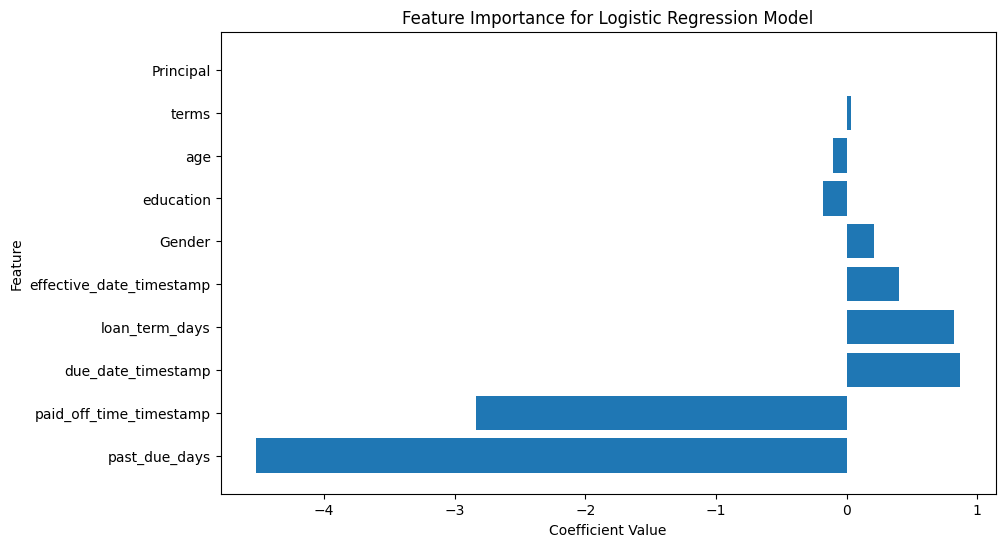

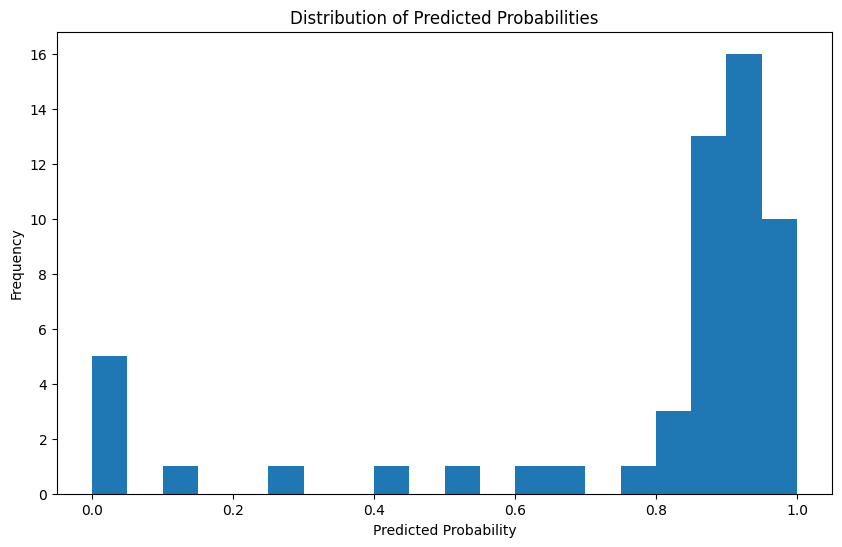

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Extract feature names
feature_names = numerical_features + categorical_features

# Extract coefficients and intercept from the trained logistic regression model
coefficients = model.named_steps['classifier'].coef_[0]
intercept = model.named_steps['classifier'].intercept_[0]

# Create a dictionary mapping feature names to coefficients
feature_coefficients = dict(zip(feature_names, coefficients))

# Sort feature coefficients by absolute value
sorted_coefficients = sorted(feature_coefficients.items(), key=lambda x: np.abs(x[1]), reverse=True)

# Print feature importance
print("Feature Importance:")
for feature, coef in sorted_coefficients:
    print(f"{feature}: {coef:.4f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_coefficients)), [coef for _, coef in sorted_coefficients], align='center')
plt.yticks(range(len(sorted_coefficients)), [feature for feature, _ in sorted_coefficients])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance for Logistic Regression Model')
plt.show()

# Predict probabilities for the test data
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Plot predicted probabilities
plt.figure(figsize=(10, 6))
plt.hist(y_pred_proba, bins=20)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.show()

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate ROC-AUC score (only applicable for binary classification)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC score:", roc_auc)

Precision: 0.9347826086956522
Recall: 1.0
F1-score: 0.9662921348314606
ROC-AUC score: 1.0


In [22]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))


Cross-validation scores: [0.93023256 0.95348837 0.88372093 0.88372093 0.88372093]
Mean cross-validation score: 0.9069767441860466


In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV

# Define numerical and categorical features
numerical_features = ['Principal', 'terms', 'past_due_days', 'age', 'loan_term_days', 'effective_date_timestamp', 'due_date_timestamp', 'paid_off_time_timestamp']
categorical_features = ['education', 'Gender']

# Preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[numerical_features + categorical_features],
                                                    df['loan_status_binary'],
                                                    test_size=0.2,
                                                    random_state=42)

# Perform grid search
param_grid = {
    'classifier__C': [0.1, 1.0, 10.0],  # Regularization parameter for logistic regression
    'classifier__penalty': ['l2'],  # Penalty norm for logistic regression compatible with lbfgs solver
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get best cross-validation score
best_score = grid_search.best_score_
print("Best cross-validation score:", best_score)


Best hyperparameters: {'classifier__C': 10.0, 'classifier__penalty': 'l2'}
Best cross-validation score: 0.9627906976744185
